In [1]:
import pandas as pd 
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns 
import joblib


In [2]:
data= pd.read_csv("C:/Aimind/Rising_Lion/housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
from sklearn.model_selection import train_test_split

train_set,test_set =train_test_split(data,test_size=0.2,random_state=30)

print(train_set.shape,test_set.shape)
test_set.isnull().sum()

(16512, 10) (4128, 10)


longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        45
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
dtype: int64

In [4]:
# seperating x_train and y_train

housing=train_set.drop('median_house_value',axis=1)  #  x_train
housing_label=train_set['median_house_value']        # y_train

num_attr= housing.select_dtypes(include=[np.number]).columns.tolist()
cat_attr= housing.select_dtypes(exclude=[np.number]).columns.tolist()

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ("num_imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline= Pipeline([
    ("cat_imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_1hot_encoder", OneHotEncoder())
])

full_pipeline= ColumnTransformer([
    ("num_pipe", num_pipeline,num_attr),
    ("cat_pipe", cat_pipeline,cat_attr)
])

housing_prepared= full_pipeline.fit_transform(housing)

In [5]:
housing_prepared.shape

(16512, 13)

In [6]:
### Training model
 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lin_model=LinearRegression()
lin_model.fit(housing_prepared,housing_label)
lin_pred= lin_model.predict(housing_prepared)
lin_mse=mean_squared_error(housing_label,lin_pred)
lin_r2_score=r2_score(housing_label,lin_pred)
lin_rmse=np.sqrt(lin_mse)
print(f" LINEAR REGRESSION MODEL:\n")
print(f" lin_mse : {lin_mse}")
print(f" lin_r2_score : {lin_r2_score}")
print(f" lin_rmse : {lin_rmse}")
print(f"lin_rmse_mean : {lin_rmse.mean()}")
print(f"lin_rmse_std : {lin_rmse.std()}")
print("==============================================================")
print("==============================================================\n")

tree_model=DecisionTreeRegressor()
tree_model.fit(housing_prepared,housing_label)
tree_pred= tree_model.predict(housing_prepared)
tree_mse=mean_squared_error(housing_label,tree_pred)
tree_r2_score=r2_score(housing_label,tree_pred)
tree_rmse=np.sqrt(tree_mse)
print(f" DECISION TREE REGRESSOR MODEL:\n")
print(f" tree_mse : {tree_mse}")
print(f" tree_r2_score : {tree_r2_score}")
print(f" tree_rmse : {tree_rmse}")
print(f"tree_rmse_mean : {tree_rmse.mean()}")
print(f"tree_rmse_std : {tree_rmse.std()}")
print("==============================================================")
print("==============================================================\n")

forest_model=RandomForestRegressor()
forest_model.fit(housing_prepared,housing_label)
forest_pred= forest_model.predict(housing_prepared)
forest_mse=mean_squared_error(housing_label,forest_pred)
forest_r2_score=r2_score(housing_label,forest_pred)
forest_rmse=np.sqrt(forest_mse)
print(f" RANDOM FOREST REGRESSOR MODEL:\n")
print(f" forest_mse : {forest_mse}")
print(f" forest_r2_score : {forest_r2_score}")
print(f" forest_rmse : {forest_rmse}")
print(f"forest_rmse_mean : {forest_rmse.mean()}")
print(f"forest_rmse_std : {forest_rmse.std()}")
print("==============================================================")
print("==============================================================")

 LINEAR REGRESSION MODEL:

 lin_mse : 4605251829.804271
 lin_r2_score : 0.650990152292607
 lin_rmse : 67862.00578972207
lin_rmse_mean : 67862.00578972207
lin_rmse_std : 0.0

 DECISION TREE REGRESSOR MODEL:

 tree_mse : 0.0
 tree_r2_score : 1.0
 tree_rmse : 0.0
tree_rmse_mean : 0.0
tree_rmse_std : 0.0

 RANDOM FOREST REGRESSOR MODEL:

 forest_mse : 335015871.8694886
 forest_r2_score : 0.9746107612044097
 forest_rmse : 18303.43879902049
forest_rmse_mean : 18303.43879902049
forest_rmse_std : 0.0


In [7]:
######## EVALUATION WITH CROSS-VAL-SCORE(cross vallidaton ) 

from sklearn.model_selection import cross_val_score

lin_score= cross_val_score(lin_model,housing_prepared,housing_label,scoring="neg_mean_squared_error",cv=5)
lin_rmse_score=np.sqrt(-lin_score)

print(f" LINEAR REGRESSION MODEL SCORE BY  CV :\n")
print(f" lin_mse_score : {-(lin_score)}")
print(f" lin_rmse_score : {lin_rmse_score}")
print(f" lin_rmse_score_mean : {lin_rmse_score.mean()}")
print(f" lin_rmse_score_std : {lin_rmse_score.std()}")
print("==============================================================")
print("==============================================================\n")


tree_score= cross_val_score(tree_model,housing_prepared,housing_label,scoring="neg_mean_squared_error",cv=5)
tree_rmse_score=np.sqrt(-tree_score)
print(f" DECISION TREE REGRESSOR MODEL SCORE BY  CV :\n")
print(f" tree_mse_score : {-(tree_score)}")
print(f" tree_rmse_score : {tree_rmse_score}")
print(f" tree_rmse_score_mean : {tree_rmse_score.mean()}")
print(f" tree_rmse_score_std : {tree_rmse_score.std()}")
print("==============================================================")
print("==============================================================\n")


forest_score= cross_val_score(forest_model,housing_prepared,housing_label,scoring="neg_mean_squared_error",cv=5)
forest_rmse_score=np.sqrt(-forest_score)
print(f" RANDOM FOREST REGRESSOR MODEL SCORE BY  CV :\n")
print(f" forest_mse_score : {-(forest_score)}")
print(f" forest_rmse_score : {forest_rmse_score}")
print(f" forest_rmse_score_mean : {forest_rmse_score.mean()}")
print(f" forest_rmse_score_std : {forest_rmse_score.std()}")

 LINEAR REGRESSION MODEL SCORE BY  CV :

 lin_mse_score : [4.82100770e+09 4.66594491e+09 4.66504261e+09 4.56526338e+09
 4.39010053e+09]
 lin_rmse_score : [69433.4768204  68307.7221487  68301.117204   67566.73279258
 66257.83374294]
 lin_rmse_score_mean : 67973.37654172447
 lin_rmse_score_std : 1044.9440160651611

 DECISION TREE REGRESSOR MODEL SCORE BY  CV :

 tree_mse_score : [4.78784627e+09 4.77849521e+09 5.34972272e+09 4.87569656e+09
 4.90885294e+09]
 tree_rmse_score : [69194.26471227 69126.66062738 73141.79874422 69826.18822568
 70063.20671703]
 tree_rmse_score_mean : 70270.42380531691
 tree_rmse_score_std : 1479.958838105288

 RANDOM FOREST REGRESSOR MODEL SCORE BY  CV :

 forest_mse_score : [2.58298960e+09 2.38430435e+09 2.61053388e+09 2.34718688e+09
 2.32592893e+09]
 forest_rmse_score : [50823.12074811 48829.33901072 51093.38389944 48447.77473746
 48227.88535875]
 forest_rmse_score_mean : 49484.30075089693
 forest_rmse_score_std : 1221.7633370766903


# Transformation

In [8]:
df=train_set.copy()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7186,-118.18,34.03,39.0,609.0,145.0,690.0,134.0,2.9167,145800.0,<1H OCEAN
7686,-118.10,33.93,35.0,1622.0,302.0,845.0,284.0,4.5769,186100.0,<1H OCEAN
6332,-117.95,33.99,24.0,1219.0,177.0,610.0,185.0,6.7978,325000.0,<1H OCEAN
14192,-117.07,32.69,20.0,2192.0,406.0,1766.0,393.0,4.0921,135000.0,NEAR OCEAN
6611,-118.11,34.18,52.0,3571.0,510.0,1434.0,490.0,5.9009,376000.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
500,-122.27,37.85,52.0,1974.0,426.0,875.0,363.0,1.5817,153600.0,NEAR BAY
12077,-117.64,33.87,2.0,17470.0,2727.0,5964.0,1985.0,6.2308,257900.0,<1H OCEAN
15277,-117.34,33.06,17.0,2718.0,518.0,815.0,403.0,4.3182,357100.0,NEAR OCEAN
4517,-118.20,34.04,44.0,1399.0,386.0,1419.0,373.0,1.8224,143800.0,<1H OCEAN


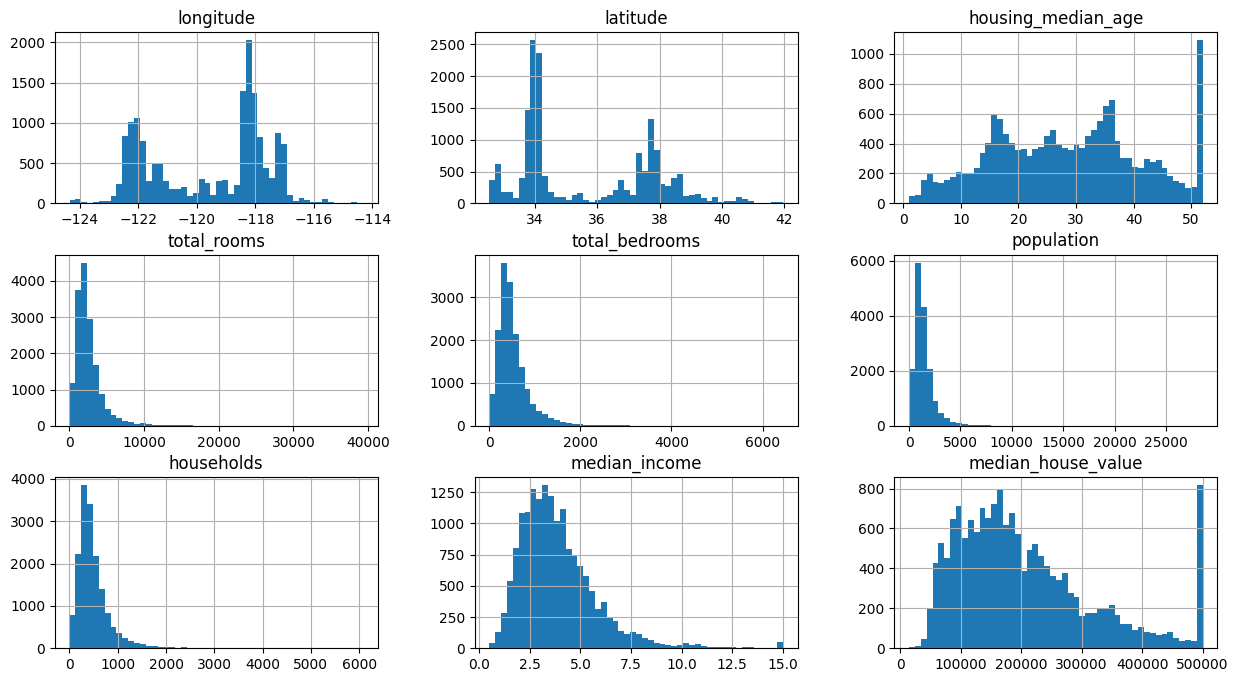

In [9]:
df.hist(bins=50,figsize=(15,8))
plt.show()       

In [ ]:
# If your dataframe is called something other than `housing`, change this line
features = ['housing_median_age', 
            'total_rooms',
            'total_bedrooms', 
            'population', 
            'households', 
            'median_income' ]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))     # 2 rows × 3 cols

for ax, col in zip(axes.flat, features):
    sns.histplot(
        data=df,          # your dataframe
        x=col,
        ax=ax,
        bins="auto",           # let seaborn choose a sensible bin count
        kde=False,             # flip to True if you want the smooth curve
    )
    ax.set_title(col.replace("_", " ").title())
    ax.set_xlabel("")
    ax.set_ylabel("Count")

fig.suptitle("Distribution of California‑Housing Numeric Features Before Transformer", fontsize=16)
plt.tight_layout()
plt.show()

In [10]:
df_pt=df.copy()
df_pt.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7186,-118.18,34.03,39.0,609.0,145.0,690.0,134.0,2.9167,145800.0,<1H OCEAN
7686,-118.10,33.93,35.0,1622.0,302.0,845.0,284.0,4.5769,186100.0,<1H OCEAN
6332,-117.95,33.99,24.0,1219.0,177.0,610.0,185.0,6.7978,325000.0,<1H OCEAN
14192,-117.07,32.69,20.0,2192.0,406.0,1766.0,393.0,4.0921,135000.0,NEAR OCEAN
6611,-118.11,34.18,52.0,3571.0,510.0,1434.0,490.0,5.9009,376000.0,INLAND


In [11]:

features = ['housing_median_age',
            'total_rooms',
            'total_bedrooms', 
            'population', 
            'households', 
            'median_income']
from sklearn.preprocessing import PowerTransformer
transformer=PowerTransformer(method='yeo-johnson')
for col in features:
    df_pt[col]=transformer.fit_transform(df_pt[[col]])
df_pt.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7186,-118.18,34.03,0.827287,-1.579658,-1.454590,-0.747811,-1.463815,-0.395040,145800.0,<1H OCEAN
7686,-118.10,33.93,0.530872,-0.407466,-0.552765,-0.484724,-0.550154,0.587345,186100.0,<1H OCEAN
6332,-117.95,33.99,-0.320591,-0.775127,-1.223528,-0.901820,-1.091559,1.453510,325000.0,<1H OCEAN
14192,-117.07,32.69,-0.647232,0.005420,-0.146519,0.584249,-0.101370,0.341528,135000.0,NEAR OCEAN
6611,-118.11,34.18,1.754423,0.733905,0.184703,0.263430,0.223759,1.144891,376000.0,INLAND


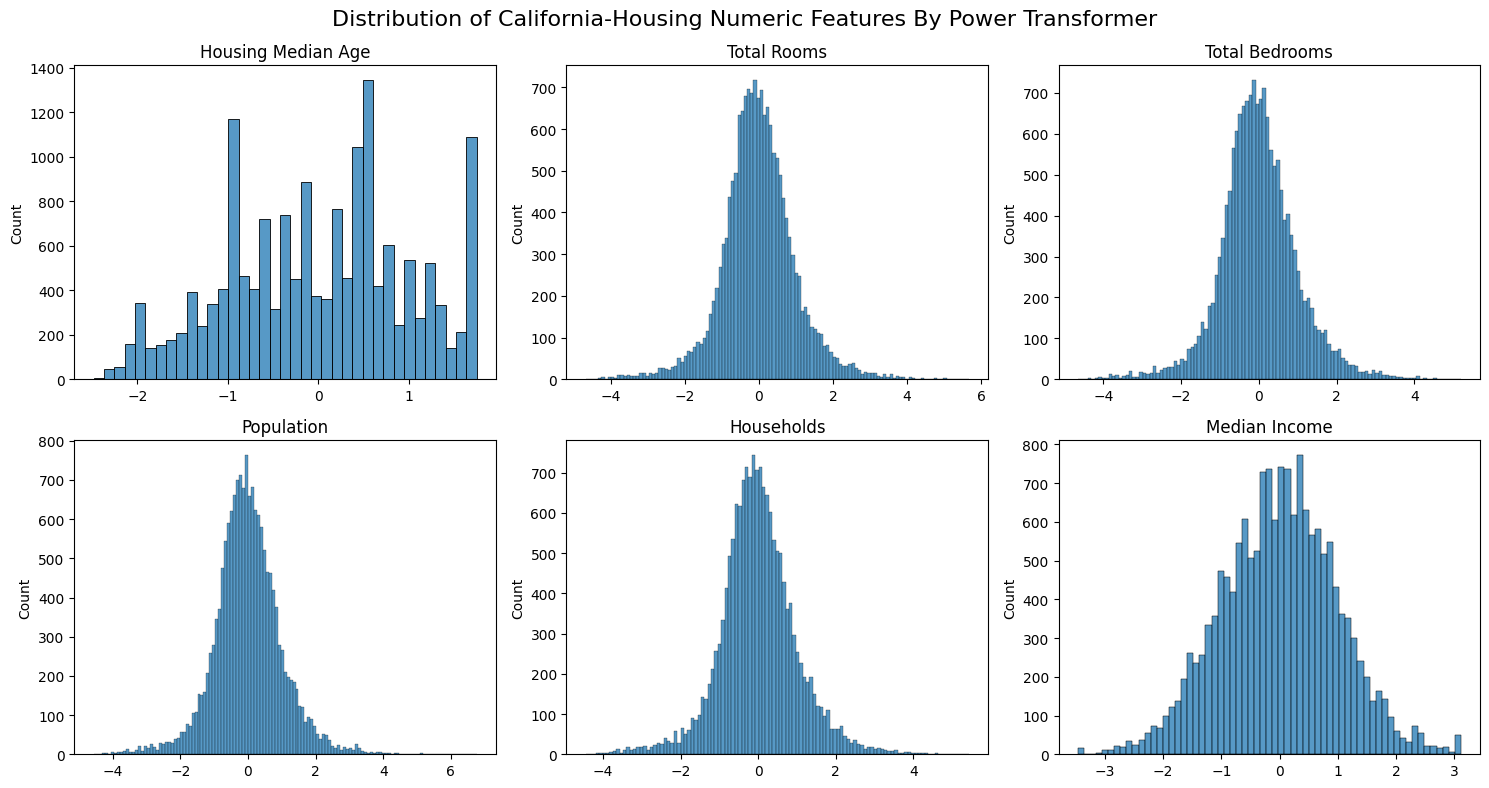

In [12]:
features = ['housing_median_age', 
            'total_rooms',
            'total_bedrooms', 
            'population', 
            'households', 
            'median_income']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))     # 2 rows × 3 cols

for ax, col in zip(axes.flat, features):
    sns.histplot(
        data=df_pt,          # your dataframe
        x=col,
        ax=ax,
        bins="auto",           # let seaborn choose a sensible bin count
        kde=False,             # flip to True if you want the smooth curve
    )
    ax.set_title(col.replace("_", " ").title())
    ax.set_xlabel("")
    ax.set_ylabel("Count")

fig.suptitle("Distribution of California‑Housing Numeric Features By Power Transformer", fontsize=16)
plt.tight_layout()
plt.show()

In [22]:
df_bxcx=df.copy()
df_bxcx.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7186,-118.18,34.03,39.0,609.0,145.0,690.0,134.0,2.9167,145800.0,<1H OCEAN
7686,-118.10,33.93,35.0,1622.0,302.0,845.0,284.0,4.5769,186100.0,<1H OCEAN
6332,-117.95,33.99,24.0,1219.0,177.0,610.0,185.0,6.7978,325000.0,<1H OCEAN
14192,-117.07,32.69,20.0,2192.0,406.0,1766.0,393.0,4.0921,135000.0,NEAR OCEAN
6611,-118.11,34.18,52.0,3571.0,510.0,1434.0,490.0,5.9009,376000.0,INLAND


In [24]:
df_bxcx['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [25]:
df_bxcx.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.561793,35.625026,28.623849,2637.965661,537.363735,1430.236434,500.155342,3.877301,206342.239704
std,2.001340,2.133272,12.637352,2184.716608,419.048968,1118.175063,381.851846,1.916761,114873.803934
min,-124.350000,32.550000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1452.000000,298.000000,792.000000,280.000000,2.565175,120000.000000
50%,-118.490000,34.250000,29.000000,2131.000000,436.000000,1170.000000,410.000000,3.538600,179500.000000
75%,-118.000000,37.710000,37.000000,3153.000000,643.000000,1734.000000,606.000000,4.744000,264000.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


In [26]:
features = ['housing_median_age',
            'total_rooms',
            'total_bedrooms', 
            'population', 
            'households', 
            'median_income']
from scipy.stats import boxcox
for col in features:
    df_bxcx[col],_=boxcox(df_bxcx[col])
df_bxcx.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7186,-118.18,34.03,22.662416,13.853249,9.033608,15.487965,9.378517,1.117368,145800.0,<1H OCEAN
7686,-118.10,33.93,20.660956,18.205199,11.410258,16.449385,12.069166,1.616902,186100.0,<1H OCEAN
6332,-117.95,33.99,14.905484,16.839927,9.642135,14.925260,10.474260,2.070480,325000.0,<1H OCEAN
14192,-117.07,32.69,12.693728,19.738793,12.482698,20.358575,13.392867,1.491094,135000.0,NEAR OCEAN
6611,-118.11,34.18,28.918425,22.445711,13.358098,19.184864,14.352909,1.906597,376000.0,INLAND


In [27]:
df_bxcx['total_bedrooms'].iloc[0]

9.033608214493793

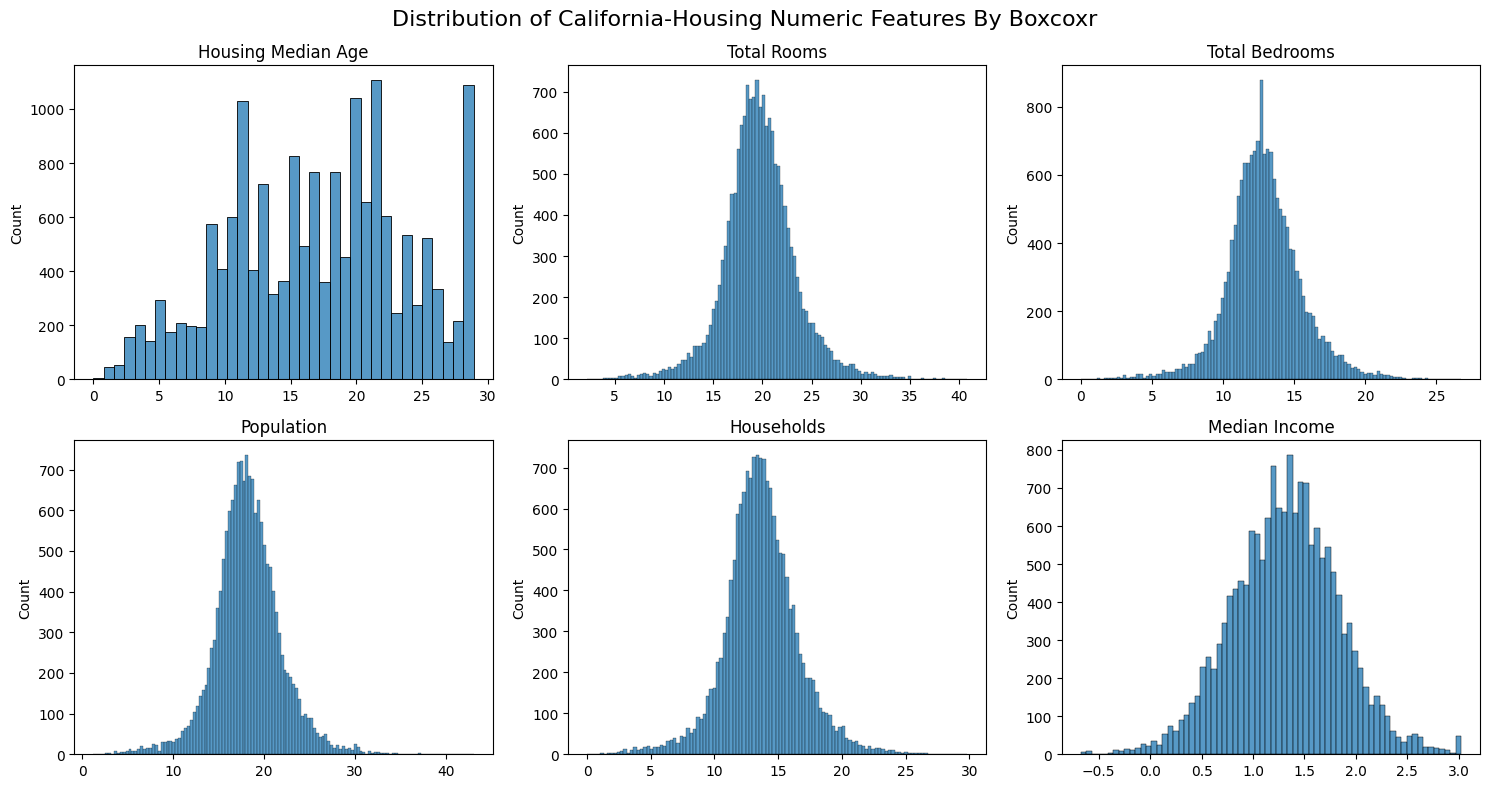

In [28]:
features = ['housing_median_age', 
            'total_rooms',
            'total_bedrooms', 
            'population', 
            'households', 
            'median_income']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))     # 2 rows × 3 cols

for ax, col in zip(axes.flat, features):
    sns.histplot(
        data=df_bxcx,          # your dataframe
        x=col,
        ax=ax,
        bins="auto",           # let seaborn choose a sensible bin count
        kde=False,             # flip to True if you want the smooth curve
    )
    ax.set_title(col.replace("_", " ").title())
    ax.set_xlabel("")
    ax.set_ylabel("Count")

fig.suptitle("Distribution of California‑Housing Numeric Features By Boxcoxr", fontsize=16)
plt.tight_layout()
plt.show()

In [29]:
df_bxcx

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7186,-118.18,34.03,22.662416,13.853249,9.033608,15.487965,9.378517,1.117368,145800.0,<1H OCEAN
7686,-118.10,33.93,20.660956,18.205199,11.410258,16.449385,12.069166,1.616902,186100.0,<1H OCEAN
6332,-117.95,33.99,14.905484,16.839927,9.642135,14.925260,10.474260,2.070480,325000.0,<1H OCEAN
14192,-117.07,32.69,12.693728,19.738793,12.482698,20.358575,13.392867,1.491094,135000.0,NEAR OCEAN
6611,-118.11,34.18,28.918425,22.445711,13.358098,19.184864,14.352909,1.906597,376000.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
500,-122.27,37.85,28.918425,19.194013,12.663645,16.619562,13.059624,0.466967,153600.0,NEAR BAY
12077,-117.64,33.87,0.929261,33.511128,21.335688,28.492400,21.791973,1.969386,257900.0,<1H OCEAN
15277,-117.34,33.06,10.978971,20.896714,13.419457,16.274518,13.499655,1.551385,357100.0,NEAR OCEAN
4517,-118.20,34.04,25.109837,17.487743,12.294657,19.127105,13.172952,0.614717,143800.0,<1H OCEAN


In [41]:
x_train=df_bxcx.drop('median_house_value',axis=1)
y_train=df_bxcx['median_house_value']

In [44]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
7186,-118.18,34.03,22.662416,13.853249,9.033608,15.487965,9.378517,1.117368,<1H OCEAN
7686,-118.10,33.93,20.660956,18.205199,11.410258,16.449385,12.069166,1.616902,<1H OCEAN
6332,-117.95,33.99,14.905484,16.839927,9.642135,14.925260,10.474260,2.070480,<1H OCEAN
14192,-117.07,32.69,12.693728,19.738793,12.482698,20.358575,13.392867,1.491094,NEAR OCEAN
6611,-118.11,34.18,28.918425,22.445711,13.358098,19.184864,14.352909,1.906597,INLAND
...,...,...,...,...,...,...,...,...,...
500,-122.27,37.85,28.918425,19.194013,12.663645,16.619562,13.059624,0.466967,NEAR BAY
12077,-117.64,33.87,0.929261,33.511128,21.335688,28.492400,21.791973,1.969386,<1H OCEAN
15277,-117.34,33.06,10.978971,20.896714,13.419457,16.274518,13.499655,1.551385,NEAR OCEAN
4517,-118.20,34.04,25.109837,17.487743,12.294657,19.127105,13.172952,0.614717,<1H OCEAN


In [45]:
num_attr= x_train.select_dtypes(include=[np.number]).columns.tolist()
cat_attr= x_train.select_dtypes(exclude=[np.number]).columns.tolist()

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ("num_imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline= Pipeline([
    ("cat_imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_1hot_encoder", OneHotEncoder())
])

full_pipeline= ColumnTransformer([
    ("num_pipe", num_pipeline,num_attr),
    ("cat_pipe", cat_pipeline,cat_attr)
])

housing_prepared= full_pipeline.fit_transform(x_train)



In [46]:
housing_prepared[0]

array([ 0.69045468, -0.74771271,  0.82700044, -1.57867257, -1.45753453,
       -0.74757498, -1.46027381, -0.38794909,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [47]:
y_train

7186     145800.0
7686     186100.0
6332     325000.0
14192    135000.0
6611     376000.0
           ...   
500      153600.0
12077    257900.0
15277    357100.0
4517     143800.0
5925     248700.0
Name: median_house_value, Length: 16512, dtype: float64

In [48]:
### Training model
 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lin_model=LinearRegression()
lin_model.fit(housing_prepared,y_train)
lin_pred= lin_model.predict(housing_prepared)
lin_mse=mean_squared_error(y_train,lin_pred)
lin_r2_score=r2_score(y_train,lin_pred)
lin_rmse=np.sqrt(lin_mse)
print(f" LINEAR REGRESSION MODEL:\n")
print(f" lin_mse : {lin_mse}")
print(f" lin_r2_score : {lin_r2_score}")
print(f" lin_rmse : {lin_rmse}")
print(f"lin_rmse_mean : {lin_rmse.mean()}")
print(f"lin_rmse_std : {lin_rmse.std()}")
print("==============================================================")
print("==============================================================\n")

tree_model=DecisionTreeRegressor()
tree_model.fit(housing_prepared,y_train)
tree_pred= tree_model.predict(housing_prepared)
tree_mse=mean_squared_error(y_train,tree_pred)
tree_r2_score=r2_score(y_train,tree_pred)
tree_rmse=np.sqrt(tree_mse)
print(f" DECISION TREE REGRESSOR MODEL:\n")
print(f" tree_mse : {tree_mse}")
print(f" tree_r2_score : {tree_r2_score}")
print(f" tree_rmse : {tree_rmse}")
print(f"tree_rmse_mean : {tree_rmse.mean()}")
print(f"tree_rmse_std : {tree_rmse.std()}")
print("==============================================================")
print("==============================================================\n")

forest_model=RandomForestRegressor()
forest_model.fit(housing_prepared,y_train)
forest_pred= forest_model.predict(housing_prepared)
forest_mse=mean_squared_error(y_train,forest_pred)
forest_r2_score=r2_score(y_train,forest_pred)
forest_rmse=np.sqrt(forest_mse)
print(f" RANDOM FOREST REGRESSOR MODEL:\n")
print(f" forest_mse : {forest_mse}")
print(f" forest_r2_score : {forest_r2_score}")
print(f" forest_rmse : {forest_rmse}")
print(f"forest_rmse_mean : {forest_rmse.mean()}")
print(f"forest_rmse_std : {forest_rmse.std()}")
print("==============================================================")
print("==============================================================")

 LINEAR REGRESSION MODEL:

 lin_mse : 4976836327.392515
 lin_r2_score : 0.6228295535443704
 lin_rmse : 70546.6960770844
lin_rmse_mean : 70546.6960770844
lin_rmse_std : 0.0

 DECISION TREE REGRESSOR MODEL:

 tree_mse : 0.0
 tree_r2_score : 1.0
 tree_rmse : 0.0
tree_rmse_mean : 0.0
tree_rmse_std : 0.0

 RANDOM FOREST REGRESSOR MODEL:

 forest_mse : 330879993.15494657
 forest_r2_score : 0.9749241995251888
 forest_rmse : 18190.107013290126
forest_rmse_mean : 18190.107013290126
forest_rmse_std : 0.0


In [49]:
######## EVALUATION WITH CROSS-VAL-SCORE(cross vallidaton ) 

from sklearn.model_selection import cross_val_score

lin_score= cross_val_score(lin_model,housing_prepared,y_train,scoring="neg_mean_squared_error",cv=5)
lin_rmse_score=np.sqrt(-lin_score)

print(f" LINEAR REGRESSION MODEL SCORE BY  CV :\n")
print(f" lin_mse_score : {-(lin_score)}")
print(f" lin_rmse_score : {lin_rmse_score}")
print(f" lin_rmse_score_mean : {lin_rmse_score.mean()}")
print(f" lin_rmse_score_std : {lin_rmse_score.std()}")
print("==============================================================")
print("==============================================================\n")


tree_score= cross_val_score(tree_model,housing_prepared,y_train,scoring="neg_mean_squared_error",cv=5)
tree_rmse_score=np.sqrt(-tree_score)
print(f" DECISION TREE REGRESSOR MODEL SCORE BY  CV :\n")
print(f" tree_mse_score : {-(tree_score)}")
print(f" tree_rmse_score : {tree_rmse_score}")
print(f" tree_rmse_score_mean : {tree_rmse_score.mean()}")
print(f" tree_rmse_score_std : {tree_rmse_score.std()}")
print("==============================================================")
print("==============================================================\n")


forest_score= cross_val_score(forest_model,housing_prepared,y_train,scoring="neg_mean_squared_error",cv=5)
forest_rmse_score=np.sqrt(-forest_score)
print(f" RANDOM FOREST REGRESSOR MODEL SCORE BY  CV :\n")
print(f" forest_mse_score : {-(forest_score)}")
print(f" forest_rmse_score : {forest_rmse_score}")
print(f" forest_rmse_score_mean : {forest_rmse_score.mean()}")
print(f" forest_rmse_score_std : {forest_rmse_score.std()}")


 LINEAR REGRESSION MODEL SCORE BY  CV :

 lin_mse_score : [5.34031256e+09 5.06232866e+09 4.99021970e+09 4.85632870e+09
 4.71282710e+09]
 lin_rmse_score : [73077.44220104 71150.0432864  70641.48711336 69687.36396723
 68650.03347032]
 lin_rmse_score_mean : 70641.27400766869
 lin_rmse_score_std : 1487.8672611227557

 DECISION TREE REGRESSOR MODEL SCORE BY  CV :

 tree_mse_score : [4.93186864e+09 4.90052158e+09 5.33351796e+09 4.71616681e+09
 4.79748377e+09]
 tree_rmse_score : [70227.26422001 70003.72550737 73030.93840162 68674.3533888
 69263.87060691]
 tree_rmse_score_mean : 70240.03042494383
 tree_rmse_score_std : 1499.960192551357

 RANDOM FOREST REGRESSOR MODEL SCORE BY  CV :

 forest_mse_score : [2.55777505e+09 2.39710167e+09 2.61309989e+09 2.33882446e+09
 2.34246561e+09]
 forest_rmse_score : [50574.45059762 48960.20491453 51118.48870887 48361.39428025
 48399.0249061 ]
 forest_rmse_score_mean : 49482.71268147328
 forest_rmse_score_std : 1146.5080381144564
